# PROYECTO - Inferencia de Ingresos

En este notebook implementamo el pipeline completo: carga, limpieza, EDA, ingeniería, entrenamiento de modelos de regresión, evaluación, guardado de modelos y funciones de inferencia.

---
#### Flujo de Trabajo

- **Fase 1:** Carga y concatenación de datos  
- **Fase 2:** Limpieza, estandarización y preprocesamiento inicial  
- **Fase 3:** Análisis Exploratorio de Datos (EDA) con estadísticas  
- **Fase 4:** Preparación del dataset para entrenamiento  
- **Fase 5:** Entrenamiento de los *10 modelos de regresión*  
- **Fase 6:** Selección del mejor modelo según desempeño (**R²**)  
- **Fase 7:** Evaluación y análisis de errores  
- **Fase 8:** Funciones de predicción para datos nuevos  
---
#### 📁 Carpetas
`./data/:` Es la carpeta donde se encuentran los archivos CSV con los datos de nómina.

`./models/:` Carpeta donde se guardan los modelos entrenados en formato joblib.

In [1]:
# Importamos librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

sns.set(style="whitegrid")

### Fase 1: Carga y concatenación de datos

En esta sección se cargan las nóminas públicas desde archivos CSV.

In [2]:
# Ahora las nominas
df1 = pd.read_excel("./data/acuario.xlsx")
df2 = pd.read_excel("./data/ciencia.xlsx")
df3 = pd.read_excel("./data/comedores.xlsx")
df4 = pd.read_excel("./data/consumidor.xlsx")
df5 = pd.read_excel("./data/contraloria.xlsx")

### Fase 2: Limpieza, estandarización y preprocesamiento

Aquí homogenizamos nombres de columnas, eliminamos filas corruptas o nulas,
convertimos sueldos a formato numérico, codificamos variables categóricas

In [3]:
# Homogeneizar columnas
def clean_cols(df):
    df.columns = (
        df.columns
        .str.lower()
        .str.strip()
        .str.replace(" ", "_")
        .str.replace("-", "_")
    )
    return df

df1 = clean_cols(df1)
df2 = clean_cols(df2)
df3 = clean_cols(df3)
df4 = clean_cols(df4)
df5 = clean_cols(df5)

In [4]:
# Concatenar las nominas en una sola
df = pd.concat([df1, df2, df3, df4, df5], ignore_index=True)
df

,nombres,apellidos,insitución,función,área,genero,estatus,sueldo_bruto
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,EDWIN AMBIORIX,MENDEZ BAUTISTA,ACUARIO NACIONAL,PINTOR,SECCION DE MAYORDOMIA- ACUARIO,MASCULINO,FIJO,"23,000.00"
2,EDISON,ESTEVEZ FILION,ACUARIO NACIONAL,CHOFER I,DEPARTAMENTO DE CALIDAD DE VIDA DE LAS ESPECIE...,MASCULINO,FIJO,"31,000.00"
3,MARGARITA,REYES DIAZ,ACUARIO NACIONAL,CONSERJE,SECCION DE MAYORDOMIA- ACUARIO,FEMENINO,FIJO,"21,000.00"
4,CRISTIAN,CUEVAS,ACUARIO NACIONAL,CONSERJE,SECCION DE MAYORDOMIA- ACUARIO,MASCULINO,FIJO,"21,000.00"
...,...,...,...,...,...,...,...,...
6052,ROSELAINE,RODRIGUEZ SANCHEZ,CONTRALORIA GENERAL DE LA REPUBLICA,ANALISTA RECLU. SELEC. Y EVALUACION,DIRECCIÓN DE RECURSOS HUMANOS- CGR,FEMENINO,EMPLEADOS TEMPORALES,"70,000.00"
6053,LIDIA,CABRAL,CONTRALORIA GENERAL DE LA REPUBLICA,AUXILIAR ADMINISTRATIVO (A),DIRECCIÓN DE UNIDADES DE AUDITORÍA INTERNA GUB...,FEMENINO,FIJO,"40,000.00"
6054,VIRTUDIS,MONTERO MONTERO,CONTRALORIA GENERAL DE LA REPUBLICA,AUDITOR I,DIRECCIÓN DE UNIDADES DE AUDITORÍA INTERNA GUB...,FEMENINO,EMPLEADOS TEMPORALES,"60,000.00"
6055,NICOLAS DE OVANDO,PASCAL MORLA,CONTRALORIA GENERAL DE LA REPUBLICA,SOPORTE TECNICO,DIRECCION DE TECNOLOGIA DE LA INFORMACION,MASCULINO,FIJO,"40,000.00"


### Fase 3: Análisis Exploratorio de Datos (EDA)

En esta sección analizamos la calidad de la data, obtenemos estadísticas
descriptivas, visualizamos distribuciones, relaciones entre variables e
identificamos patrones importantes antes del modelado.

In [5]:
# Revisar datos nulos y calidad
df.isnull().sum()

nombres         5
apellidos       5
insitución      5
función         5
área            5
genero          5
estatus         5
sueldo_bruto    5
dtype: int64

In [6]:
# Eliminar filas vacias
df = df.dropna(how="all")

In [7]:
# Limpiar columna de sueldo
df = df.copy() 
temp = (
    df["sueldo_bruto"]
    .astype(str)
    .str.replace("$", "", regex=False)
    .str.replace(",", "", regex=False)
    .str.replace(" ", "", regex=False)
)

temp = pd.to_numeric(temp, errors="coerce")
df.loc[:, "sueldo_bruto"] = temp

In [8]:
# Comprobacion de la limpieza de datos
df.isnull().sum()

nombres         0
apellidos       0
insitución      0
función         0
área            0
genero          0
estatus         0
sueldo_bruto    0
dtype: int64

In [9]:
# Revisar tipos de datos
df.dtypes

nombres         object
apellidos       object
insitución      object
función         object
área            object
genero          object
estatus         object
sueldo_bruto    object
dtype: object

In [10]:
# Identificar columnas categóricas
df.select_dtypes(include="object").columns

Index(['nombres', 'apellidos', 'insitución', 'función', 'área', 'genero',
       'estatus', 'sueldo_bruto'],
      dtype='object')

In [11]:
# Verificar que tenemos minimo 6 features + 1 label
df.shape

(6052, 8)

In [12]:
# Estadisticas basicas
df.describe()

,nombres,apellidos,insitución,función,área,genero,estatus,sueldo_bruto
count,6052,6052,6052,6052,6052,6052,6052,6052.0
unique,4434,5048,5,402,307,2,6,146.0
top,JOSE LUIS,FELIZ FELIZ,COMEDORES ECONOMICOS DEL ESTADO,CONSERJE,DIRECCIÓN DE UNIDADES DE AUDITORÍA INTERNA GUB...,FEMENINO,FIJO,13000.0
freq,22,19,2600,501,889,3191,4187,1192.0


#### Graficas

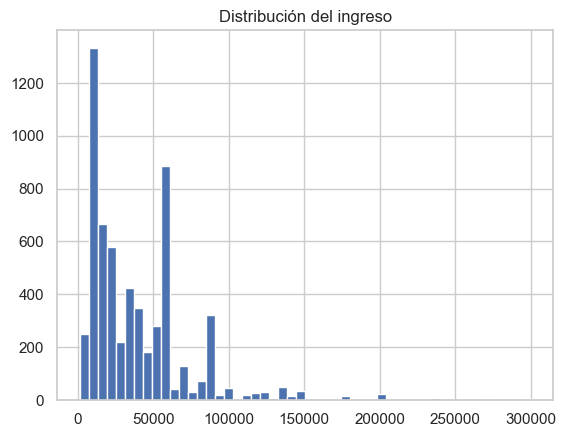

In [13]:
# Histograma del ingreso
plt.hist(df["sueldo_bruto"], bins=50)
plt.title("Distribución del ingreso")
plt.show()

<Axes: xlabel='genero', ylabel='sueldo_bruto'>

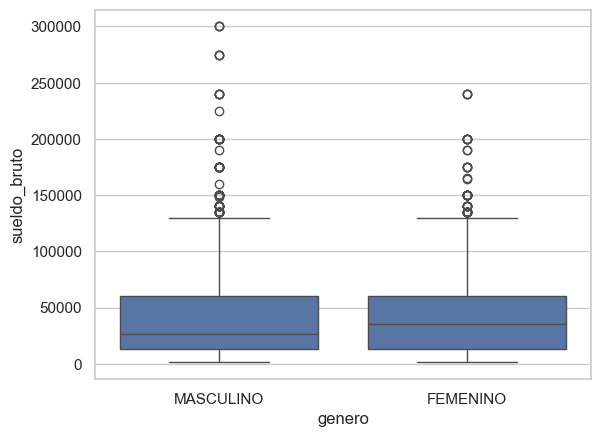

In [14]:
# Boxplot por género
sns.boxplot(x="genero", y="sueldo_bruto", data=df)

<Axes: >

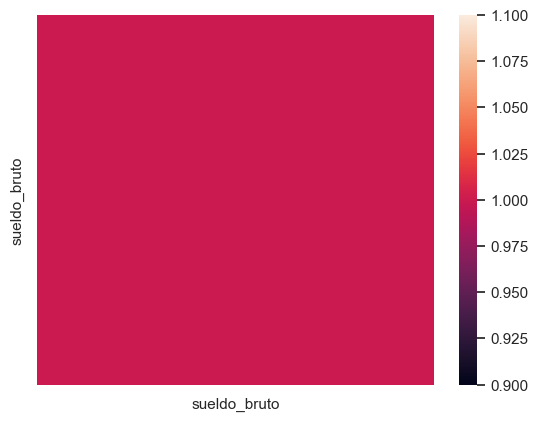

In [15]:
# Correlaciones
df["sueldo_bruto"] = pd.to_numeric(df["sueldo_bruto"], errors="coerce")
df = df.dropna(subset=["sueldo_bruto"])

sns.heatmap(df.select_dtypes(include="number").corr())

In [16]:
# Ingreso por institución
df.groupby("insitución")["sueldo_bruto"].mean().sort_values()

insitución
COMEDORES ECONOMICOS DEL ESTADO                                    17366.176454
INSTITUTO NACIONAL DE PROTECCION DE LOS DERECHOS DEL CONSUMIDOR    43321.351748
ACUARIO NACIONAL                                                   44865.404040
MINISTERIO DE EDUCACION SUPERIOR, CIENCIA Y TECNOLOGIA             51700.894854
CONTRALORIA GENERAL DE LA REPUBLICA                                62390.426340
Name: sueldo_bruto, dtype: float64

##### Guardar DataFrame unificado para inspección manual
``` python
import os
os.makedirs('data', exist_ok=True)
df.to_csv('data/df_nomina_unificado.csv', index=False, encoding='utf-8-sig')
print('Archivo exportado: data/df_nomina_unificado.csv')
```

### Fase 4: Preparación del dataset para entrenamiento

Aquí se separa el dataset en matriz de características (X) y etiqueta objetivo (y).
Luego se divide en entrenamiento y prueba para la evaluación

In [17]:
# Dividir X e y
X = df.drop("sueldo_bruto", axis=1)
y = df["sueldo_bruto"]
X.head(), y.head()
print("Shape de X:", X.shape)
print("Shape de y:", y.shape)

Shape de X: (6052, 7)
Shape de y: (6052,)


In [18]:
# Train-test split
X = df[["insitución", "función", "área", "genero", "estatus"]]
y = df["sueldo_bruto"]

# --- Train-Test Split ---
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

X_train: (4841, 5)
X_test: (1211, 5)
y_train: (4841,)
y_test: (1211,)


In [19]:
# Codificar variables categoricas
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

cat_cols = X.columns 
num_cols = []          
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore", sparse_output=False), cat_cols)
    ],
    remainder="drop"
)

X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (4841, 674)
X_test shape: (1211, 674)
y_train shape: (4841,)
y_test shape: (1211,)


### Fase 5: Entrenamiento de los 10 modelos de regresión

En esta sección entrenamos todos los modelos requeridos.
Para cada modelo se evalúan las métricas MSE, RMSE y R².

In [20]:
# 21 Entrenar y evaluar modelos
from sklearn.linear_model import LinearRegression, Ridge, Lasso, BayesianRidge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score

modelos = {
    "OLS": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "Bayesian": BayesianRidge(),
    "KNN": KNeighborsRegressor(),
    "DecisionTree": DecisionTreeRegressor(),
    "RandomForest": RandomForestRegressor(),
    "SVR": SVR(),
    "MLP": MLPRegressor(max_iter=500),
    "AdaBoost": AdaBoostRegressor()
}

resultados = []

for nombre, modelo in modelos.items():
    #print(f"Entrenando {nombre}...")
    print(f"Entrenando {nombre}... ", end="", flush=True)
    modelo.fit(X_train, y_train)
    print(f"[Listo]")
    
    pred = modelo.predict(X_test)
    mse = mean_squared_error(y_test, pred)
    rrmse = np.sqrt(mse)
    r2 = r2_score(y_test, pred)
    
    resultados.append([nombre, mse, rrmse, r2])

Entrenando OLS... [Listo]
Entrenando Ridge... [Listo]
Entrenando Lasso... [Listo]
Entrenando Bayesian... 

C:\Users\Alb3rtsonTL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.456e+10, tolerance: 5.282e+08
  model = cd_fast.enet_coordinate_descent(


[Listo]
Entrenando KNN... [Listo]
Entrenando DecisionTree... [Listo]
Entrenando RandomForest... [Listo]
Entrenando SVR... [Listo]
Entrenando MLP... [Listo]
Entrenando AdaBoost... 

C:\Users\Alb3rtsonTL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[Listo]


### Fase 6: Selección del mejor modelo según R²

Seleccionamos automáticamente el modelo con mejor desempeño en el conjunto de
prueba utilizando la métrica R² y lo guardamos como `modelo_final`.

In [21]:
tabla = pd.DataFrame(resultados, columns=["Modelo","MSE","RMSE","R2"])
print('\nResultados:')
display(tabla.sort_values('R2', ascending=False))

# Mejor modelo según R²
mejor_modelo_idx = tabla['R2'].idxmax()
mejor_modelo_nombre = tabla.loc[mejor_modelo_idx, 'Modelo']
mejor_r2 = tabla.loc[mejor_modelo_idx, 'R2']
modelo_final = modelos[mejor_modelo_nombre]
pred_test = modelo_final.predict(X_test)

print(f"\nMEJOR MODELO: {mejor_modelo_nombre}")
print(f"   R² en Test: {mejor_r2:.4f}")


Resultados:


,Modelo,MSE,RMSE,R2
6,RandomForest,2.320141e+08,1.523201e+04,7.857699e-01
1,Ridge,2.479317e+08,1.574585e+04,7.710723e-01
2,Lasso,2.479964e+08,1.574790e+04,7.710126e-01
3,Bayesian,2.501883e+08,1.581734e+04,7.689887e-01
8,MLP,2.982728e+08,1.727058e+04,7.245899e-01
5,DecisionTree,3.485912e+08,1.867060e+04,6.781284e-01
4,KNN,3.878123e+08,1.969295e+04,6.419136e-01
7,SVR,1.148315e+09,3.388679e+04,-6.029608e-02
9,AdaBoost,1.163092e+09,3.410414e+04,-7.394081e-02
0,OLS,7.058904e+34,2.656860e+17,-6.517837e+25



MEJOR MODELO: RandomForest
   R² en Test: 0.7858


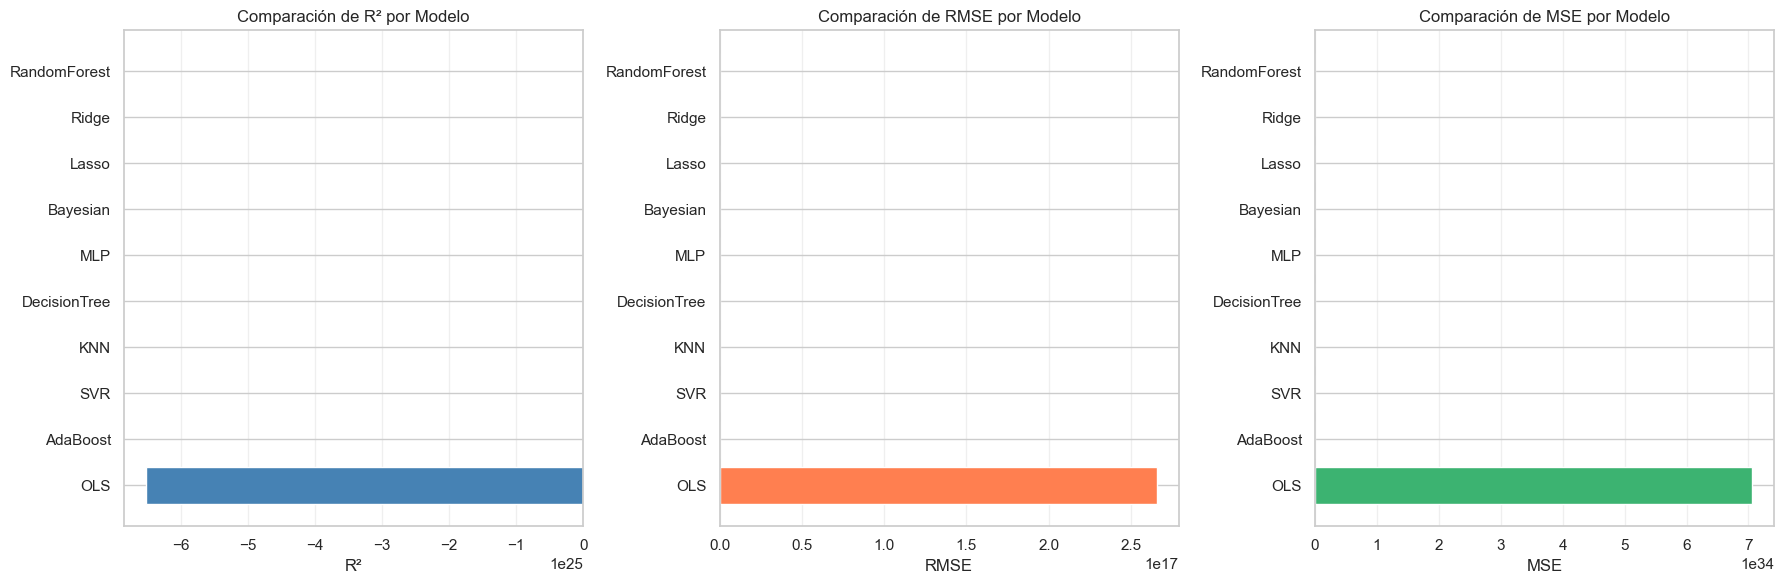

In [22]:
df_resultados = tabla  # renombramos para mantener consistencia

# Visualización de resultados
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Comparación de R²
df_sorted = df_resultados.sort_values('R2', ascending=True)
axes[0].barh(df_sorted['Modelo'], df_sorted['R2'], color='steelblue')
axes[0].set_xlabel('R²')
axes[0].set_title('Comparación de R² por Modelo')
axes[0].grid(True, alpha=0.3, axis='x')

# Comparación de RMSE
axes[1].barh(df_sorted['Modelo'], df_sorted['RMSE'], color='coral')
axes[1].set_xlabel('RMSE')
axes[1].set_title('Comparación de RMSE por Modelo')
axes[1].grid(True, alpha=0.3, axis='x')

# Comparación de MSE
axes[2].barh(df_sorted['Modelo'], df_sorted['MSE'], color='mediumseagreen')
axes[2].set_xlabel('MSE')
axes[2].set_title('Comparación de MSE por Modelo')
axes[2].grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.show()

##### Comparar promedio real vs promedio predicho

In [23]:
print("Promedio real:", y_test.mean())
print("Promedio predicho:", pred_test.mean())

Promedio real: 39150.48086705202
Promedio predicho: 38220.04747731384


### Fase 7: Evaluación y análisis de errores

Gráficas comparativas entre los valores reales y predichos, análisis de
residuales y error promedio por nivel salarial.

#### DataFrame con predicciones vs reales

In [24]:
df_eval = pd.DataFrame({
    "real": y_test,
    "pred": pred_test,
    "error_abs": np.abs(y_test - pred_test)
})

df_eval["rango"] = pd.qcut(df_eval["real"], q=4, labels=["Bajos", "Medios", "Altos", "Muy Altos"])

df_eval.groupby("rango")["error_abs"].mean()

C:\Users\Alb3rtsonTL\AppData\Local\Temp\ipykernel_7160\886899396.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_eval.groupby("rango")["error_abs"].mean()


rango
Bajos         1271.168775
Medios        5093.236162
Altos         4955.641992
Muy Altos    19453.939424
Name: error_abs, dtype: float64

#### Crear los Joblib de todos los modelos

In [25]:
# Recuperar el modelo ganador desde el diccionario modelos
modelo_final = modelos[mejor_modelo_nombre]
print(f"\nModelo final o mejor modelo: {mejor_modelo_nombre}\n")

# Recorrer todos los modelos entrenados
for nombre, modelo in modelos.items():

    paquete = {
        "model": modelo,
        "preprocessor": preprocessor,
        "scaler": scaler
    }

    ruta = f"./models/{nombre}.joblib"
    joblib.dump(paquete, ruta)

    print(f"Modelo [{nombre}] guardado: {ruta}")

print("\nTODOS los modelos fueron guardados correctamente en la carpeta /models")


Modelo final o mejor modelo: RandomForest

Modelo [OLS] guardado: ./models/OLS.joblib
Modelo [Ridge] guardado: ./models/Ridge.joblib
Modelo [Lasso] guardado: ./models/Lasso.joblib
Modelo [Bayesian] guardado: ./models/Bayesian.joblib
Modelo [KNN] guardado: ./models/KNN.joblib
Modelo [DecisionTree] guardado: ./models/DecisionTree.joblib
Modelo [RandomForest] guardado: ./models/RandomForest.joblib
Modelo [SVR] guardado: ./models/SVR.joblib
Modelo [MLP] guardado: ./models/MLP.joblib
Modelo [AdaBoost] guardado: ./models/AdaBoost.joblib

TODOS los modelos fueron guardados correctamente en la carpeta /models


#### Grafica y_test vs predicciones

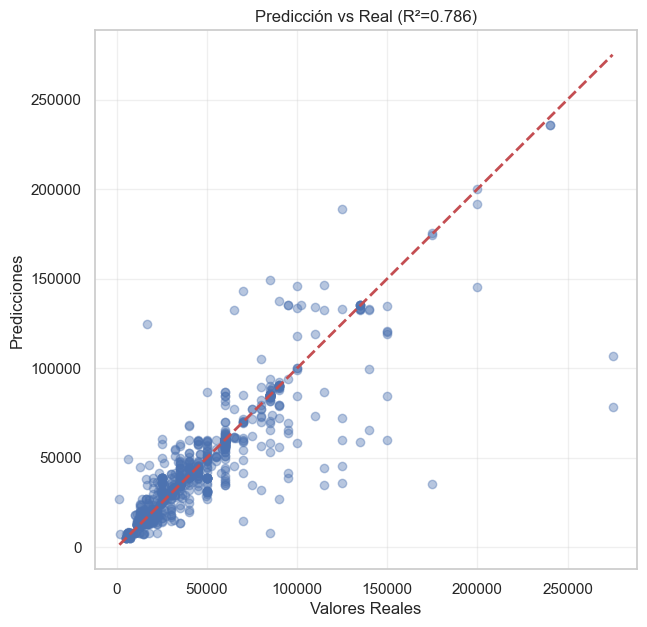

In [26]:
from sklearn.metrics import r2_score
plt.figure(figsize=(7,7))

pred_test = modelo_final.predict(X_test)

plt.scatter(y_test, pred_test, alpha=0.4)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--', linewidth=2)

plt.xlabel("Valores Reales")
plt.ylabel("Predicciones")
plt.title(f"Predicción vs Real (R²={r2_score(y_test, pred_test):.3f})")
plt.grid(True, alpha=0.3)
plt.show()

#### Gráfica de Residuales

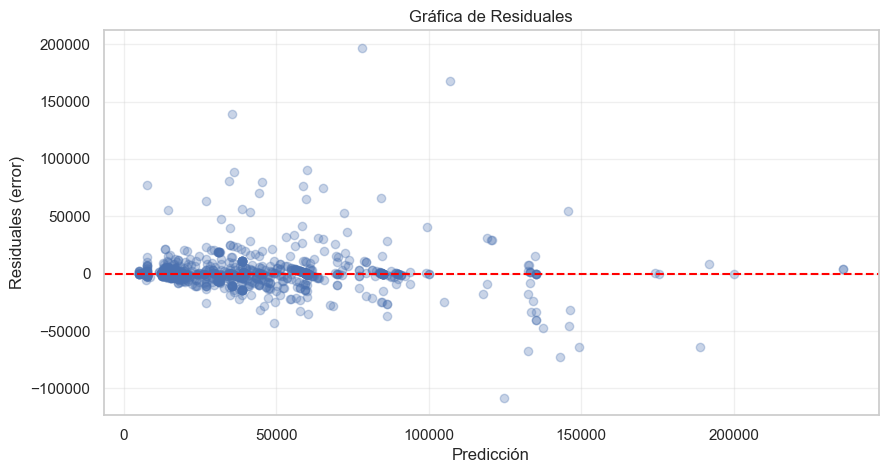

In [27]:
residuales = y_test - pred_test

plt.figure(figsize=(10,5))
plt.scatter(pred_test, residuales, alpha=0.3)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicción")
plt.ylabel("Residuales (error)")
plt.title("Gráfica de Residuales")
plt.grid(True, alpha=0.3)
plt.show()

#### Histograma de errores

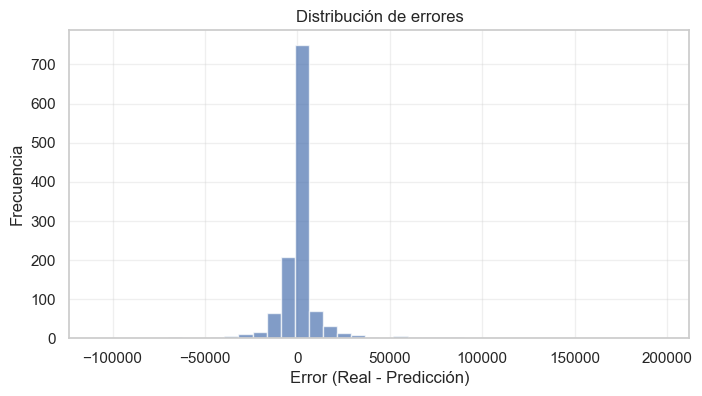

In [28]:
plt.figure(figsize=(8,4))
plt.hist(residuales, bins=40, alpha=0.7)
plt.title("Distribución de errores")
plt.xlabel("Error (Real - Predicción)")
plt.ylabel("Frecuencia")
plt.grid(True, alpha=0.3)
plt.show()

### Usando los modelo entrenado para predecir nuevos datos
#### Forma manual de usar la función para predecir desde un CSV:

In [29]:
# Forma manual de predecir nuevos datos desde un archivo CSV
nuevo = pd.read_csv("nuevo.csv", encoding="latin1", sep="\t")
cols = ["insitución", "función", "área", "genero", "estatus"]
nuevo = nuevo[cols]
from joblib import load

# Modelo a cargar para inferencia o predicción
paquete = load(f"./models/{mejor_modelo_nombre}.joblib")

modelo_final = paquete["model"]
preprocessor = paquete["preprocessor"]
scaler = paquete["scaler"]
nuevo_ohe = preprocessor.transform(nuevo)
nuevo_scaled = scaler.transform(nuevo_ohe)
prediccion = modelo_final.predict(nuevo_scaled)
prediccion

array([36389.28571429])

### Fase 8: Funciones de predicción para datos nuevos

Funciones que permiten aplicar el modelo entrenado a nuevos
datos, realizando automáticamente el preprocesamiento necesario.

#### Función para predecir desde archios CSV

In [30]:
def predecir_desde_csv(ruta_csv, ruta_modelo=f"./models/{mejor_modelo_nombre}.joblib"):
    # Cargar paquete
    paquete = joblib.load(ruta_modelo)
    modelo = paquete["model"]
    preprocessor = paquete["preprocessor"]
    scaler = paquete["scaler"]

    print("\n==============================================")
    print("PREDICCIÓN DE INGRESOS DESDE CSV")
    print("==============================================")
    print(f"Archivo: {ruta_csv}\n")

    # 1. Cargar el archivo
    df = pd.read_csv(ruta_csv, encoding="latin1", sep="\t")

    # 2. Asegurar que estén las columnas correctas
    columnas_esperadas = ["insitución", "función", "área", "genero", "estatus"]

    for col in columnas_esperadas:
        if col not in df.columns:
            raise ValueError(f"La columna requerida '{col}' NO está en el CSV.")

    df = df[columnas_esperadas]

    # 3. Transformaciones
    X_ohe = preprocessor.transform(df)
    X_scaled = scaler.transform(X_ohe)

    # 4. Predicción
    pred = modelo.predict(X_scaled)

    # 5. Guardar resultados
    df["prediccion_ingreso"] = pred
    df.to_csv("predicciones_csv.csv", index=False)

    print("Predicciones completadas correctamente.")
    print("Archivo generado: predicciones_csv.csv\n")

    return df

#### Función para predecir desde inputs manuales

In [31]:
def predecir_desde_inputs(insitucion, funcion, area, genero, estatus, ruta_modelo=f"./models/{mejor_modelo_nombre}.joblib"):
    # Cargar paquete
    paquete = joblib.load(ruta_modelo)
    modelo = paquete["model"]
    preprocessor = paquete["preprocessor"]
    scaler = paquete["scaler"]

    # Construir un DataFrame con un solo registro
    df = pd.DataFrame([{
        "insitución": insitucion,
        "función": funcion,
        "área": area,
        "genero": genero,
        "estatus": estatus
    }])

    print("\n==============================================")
    print("PREDICCIÓN DE INGRESO CON DATOS MANUALES")
    print("==============================================")
    print(df)

    # Transformar
    X_ohe = preprocessor.transform(df)
    X_scaled = scaler.transform(X_ohe)

    # Predecir
    pred = modelo.predict(X_scaled)[0]

    print(f"\nIngreso Predicho: RD$ {pred:,.2f}")

    return pred

### Ejecución ambas funciones de predicción

In [32]:
# Usando un archivo CSV
df_pred = predecir_desde_csv("nuevo.csv")
df_pred.head()


PREDICCIÓN DE INGRESOS DESDE CSV
Archivo: nuevo.csv

Predicciones completadas correctamente.
Archivo generado: predicciones_csv.csv



,insitución,función,área,genero,estatus,prediccion_ingreso
0,MINERD,PROFESOR,EDUCACION,M,FIJO,36389.285714



PREDICCIÓN DE INGRESO CON DATOS MANUALES
    insitución   función      área     genero estatus
0  CONTRALORIA  CONTADOR  FINANZAS  MASCULINO    FIJO

Ingreso Predicho: RD$ 35,189.04


<Axes: ylabel='prediccion_ingreso'>

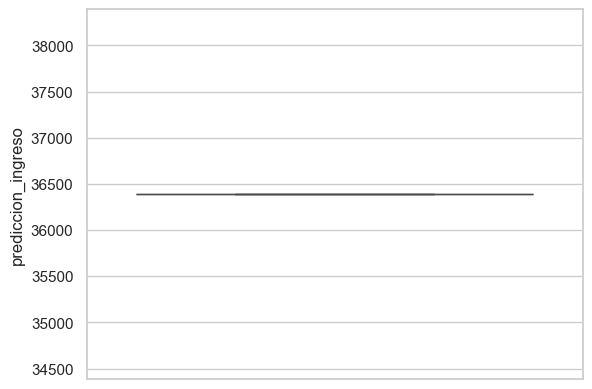

In [33]:
# Usando inputs manuales en la funcioón
predecir_desde_inputs(
    insitucion="CONTRALORIA",
    funcion="CONTADOR",
    area="FINANZAS",
    genero="MASCULINO",
    estatus="FIJO",
    ruta_modelo=f"./models/RandomForest.joblib"
)
sns.boxplot(df_pred["prediccion_ingreso"])

In [34]:
print("Ejecución del Proyecto: [TERMINADA]")

Ejecución del Proyecto: [TERMINADA]


### Conclusiones (Lo que debemos solo exponer)

Resumen de hallazgos, desempeño del modelo y importancia de características.

## Si ves este bloque borralo antes de entregar el proyecto